In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from _src.fd_elastic_solver import solve_multi_frequency_elastic
from _src.sw_solvers import eigenfunctions_solver, dc_solver
import _src.utils as ut

print("XPS:", ut.calc_velocities(18e6, 45, 0.38))
print("EPS:", ut.calc_velocities(1.7e6, 25, 0.2))
print("RW:", ut.calc_velocities(15e6, 150, 0.15))

XPS: (865.3278399146772, 380.6934938134405)
EPS: (274.8737083745107, 168.32508230603463)
RW: (324.9462449572256, 208.5144140570748)


In [2]:
x = 40
z = 10
pml = 1
h = 0.05
ampl_sou = 1
soux = 5 + pml
souy = 0
recx = np.arange(soux+20, pml+x, 0.5)
recy = np.zeros_like(recx)

nx = int((x+2*pml)/h)
nz = int((z+pml)/h)
npml = int(pml/h)

frequencies = np.array([100])
nfreq = len(frequencies)

# Barrier configuration
bar_l = 3
bar_w = 0.6

# Elastic parameters for the reference model
vs_ref = 100
qp_ref = 120
puasson_ref = 0.35

# Elastic parameters for the Rockwool barrier 
vp_rockwool = 324
vs_rockwool = 208
rho_rockwool = 150
qp_rockwool = interp1d([1, 50, 100, 400], [15, 10, 5, 5])(frequencies)

# Elastic parameters for the EPS barrier 
vp_eps = 392
vs_eps = 240
rho_eps = 21
qp_eps = interp1d([1, 50, 100, 400], [40, 30, 20, 20])(frequencies)

# Elastic parameters for the XPS barrier 
vp_xps = 1517
vs_xps = 574
rho_xps = 41
qp_xps = interp1d([1, 50, 100, 400], [60, 40, 25, 25])(frequencies)

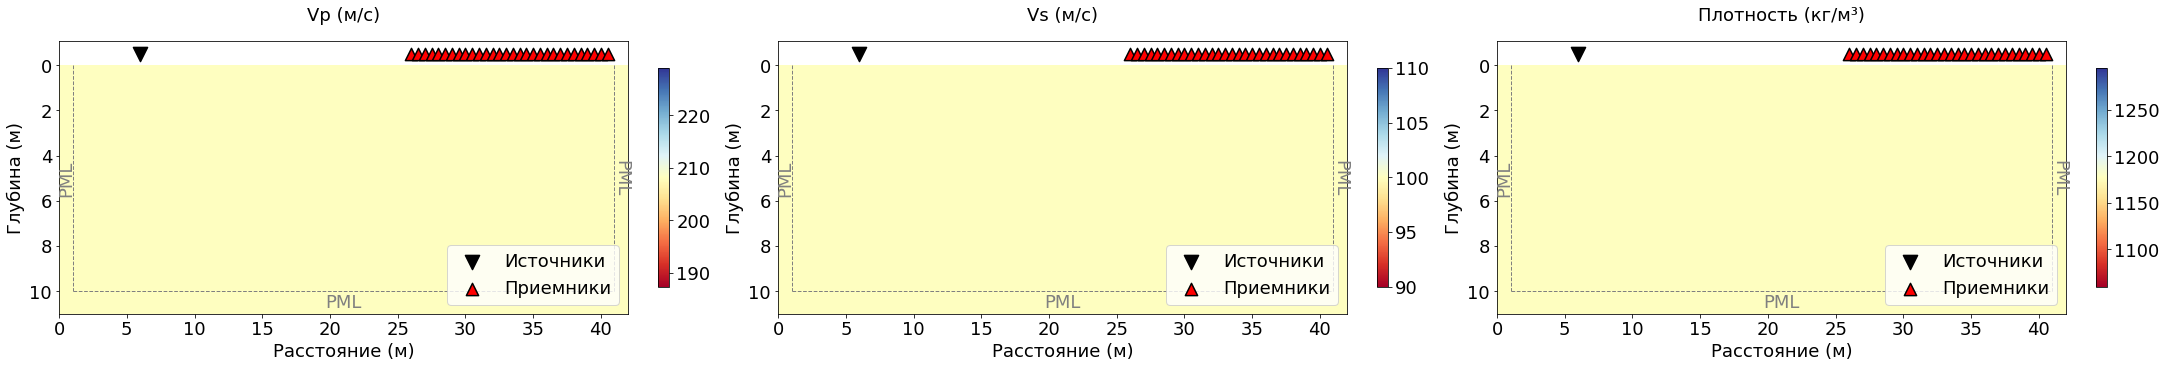

Time elapsed: 39.7s (0m 39.7s)


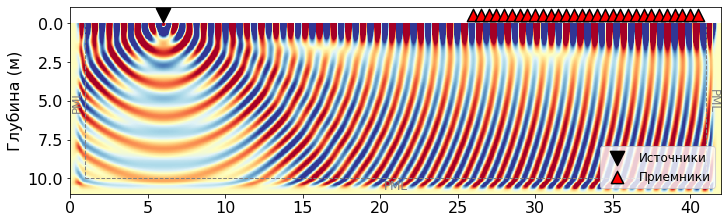

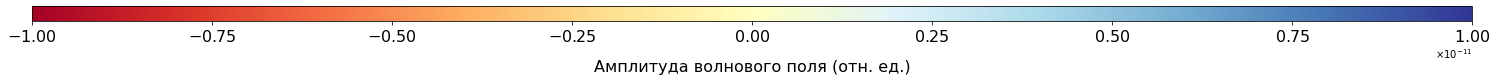

In [3]:
# preparation of a reference model
vp, vs, rho, qp, qs = ut.prepare_referent_model(nz, nx, vs_ref, puasson_ref, qp_ref, qp_ref/2, nfreq)

# drawing of a reference model
ut.draw_models(vp, vs, rho, x, z, pml, sou=[soux, souy-h*10],  rec=[recx, recy-h*10], signature_language = "ru")

# calculation elastic equation
fd_data  = solve_multi_frequency_elastic(frequencies, vp, vs, qp, qs, rho, nx, nz, h, npml, souy, soux, ampl_sou)

# drawing of a snapshot
ut.draw_real_snapshots(fd_data[0][0], x, z, pml, scale = 1e-11, 
                       sou=[soux, souy-h*10], rec=[recx, recy-h*10], 
                       fontsize=16, figsize=(10, 5), 
                       title="", figname="figures/fig_5_1", cbarfigname="figures/fig_5_colorbar", 
                       xlabelflag=False, signature_language = "ru")

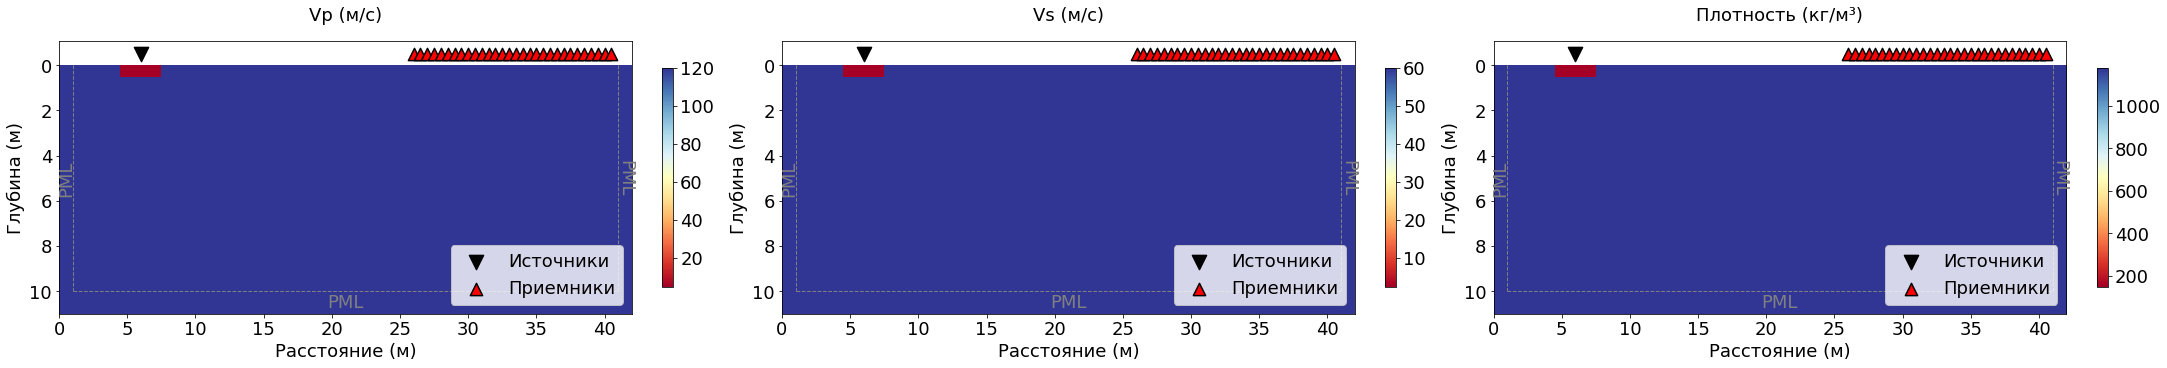

Time elapsed: 18.7s (0m 18.7s)


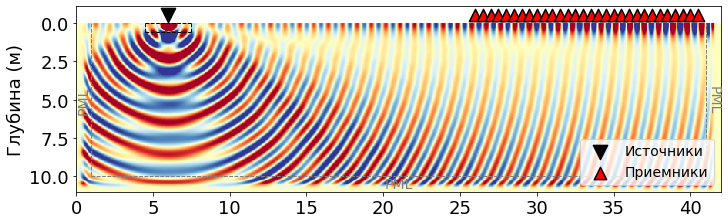

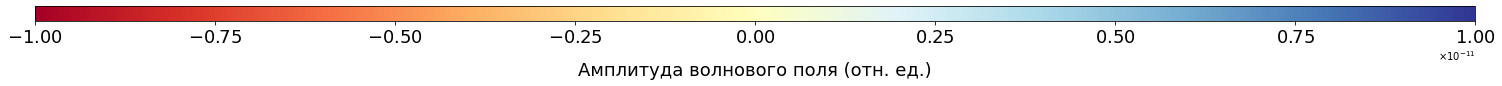

In [4]:
######################### Calculating displacement for a model with Rockwool barrier

# preparation of a reference model
vp, vs, rho, qp, qs = ut.prepare_referent_model(nz, nx, vs_ref, puasson_ref, qp_ref, qp_ref/2, nfreq)

# addition barrier to reference model
vp, vs, rho, qp, qs = ut.add_barrier2reference_model(h, vp, vs, rho, qp, qs, nfreq, 
                                                     vp_rockwool, vs_rockwool, rho_rockwool, qp_rockwool, qp_rockwool/2, 
                                                     bar_l, bar_w, soux, bar_w/2)

# drawing of a reference model
ut.draw_models(qp[0], qs[0], rho, x, z, pml, sou=[soux, souy-h*10],  rec=[recx, recy-h*10], signature_language = "ru")

# calculation elastic equation
fd_data  = solve_multi_frequency_elastic(frequencies, vp, vs, qp, qs, rho, nx, nz, h, npml, souy, soux, ampl_sou)

# drawing of a snapshot
ut.draw_real_snapshots(fd_data[0][0], x, z, pml, scale = 1e-11, sou=[soux, souy-h*10], 
                       rec=[recx, recy-h*10], fontsize=18, figsize=(10, 5), 
                       title="", figname="figures/fig_5_2", cbarfigname="figures/fig_5_colorbar", xlabelflag=False, 
                       barrier_xy=[soux, souy+bar_w/2], barrier_wh=[bar_l, bar_w], signature_language = "ru")

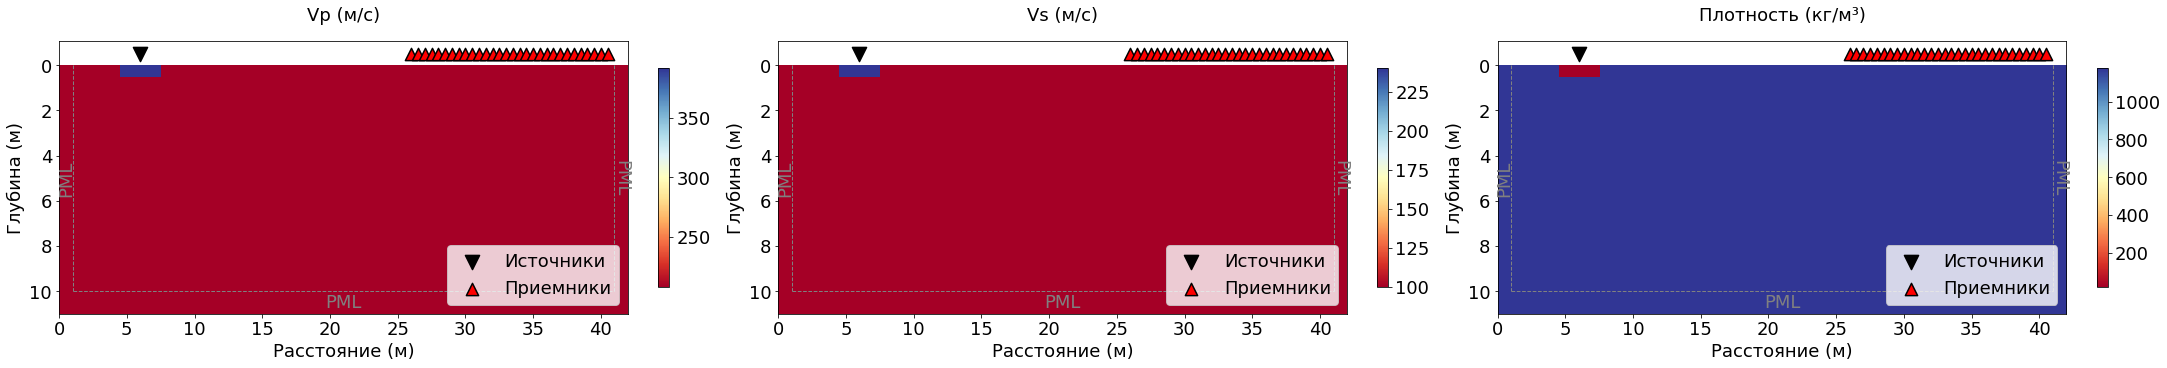

Time elapsed: 18.6s (0m 18.6s)


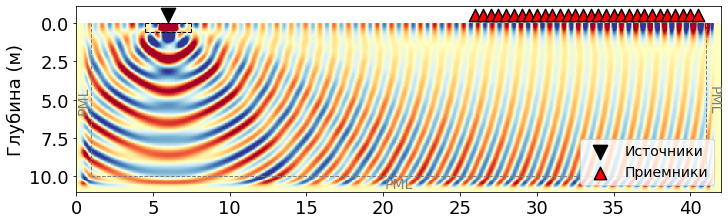

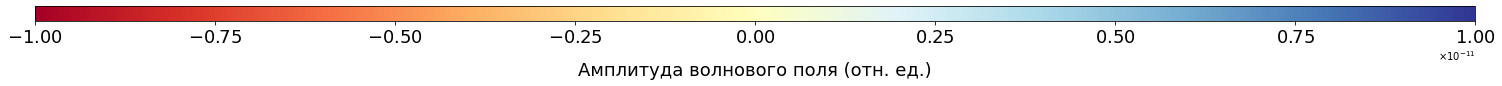

In [5]:
######################### Calculating displacement for a model with EPS barrier

# preparation of a reference model
vp, vs, rho, qp, qs = ut.prepare_referent_model(nz, nx, vs_ref, puasson_ref, qp_ref, qp_ref/2, nfreq)

# addition barrier to reference model
vp, vs, rho, qp, qs = ut.add_barrier2reference_model(h, vp, vs, rho, qp, qs, nfreq, 
                                                     vp_eps, vs_eps, rho_eps, qp_eps, qp_eps/2, 
                                                     bar_l, bar_w, soux, bar_w/2)

# drawing of a reference model
ut.draw_models(vp, vs, rho, x, z, pml, sou=[soux, souy-h*10],  rec=[recx, recy-h*10], signature_language = "ru")

# calculation elastic equation
fd_data  = solve_multi_frequency_elastic(frequencies, vp, vs, qp, qs, rho, nx, nz, h, npml, souy, soux, ampl_sou)

# drawing of a snapshot
ut.draw_real_snapshots(fd_data[0][0], x, z, pml, scale = 1e-11, sou=[soux, souy-h*10], 
                       rec=[recx, recy-h*10], fontsize=18, figsize=(10, 5), title="", 
                       figname="figures/fig_5_3", cbarfigname="figures/fig_5_colorbar", xlabelflag=False, 
                       barrier_xy=[soux, souy+bar_w/2], barrier_wh=[bar_l, bar_w], signature_language = "ru")

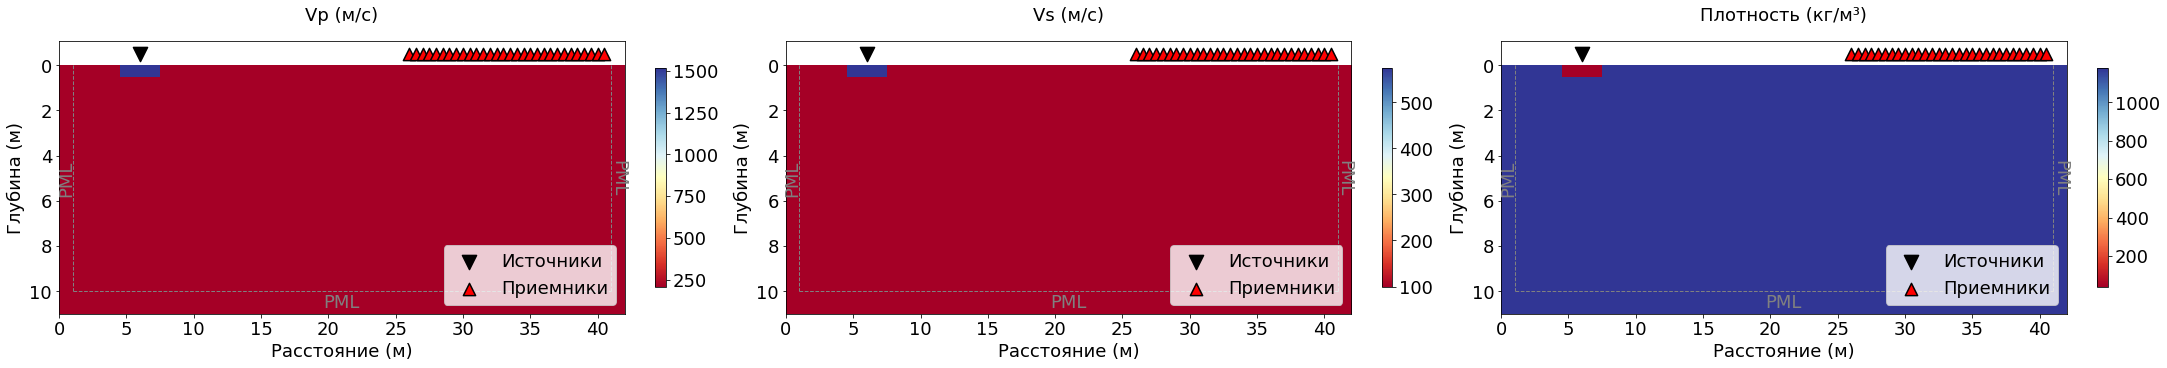

Time elapsed: 16.8s (0m 16.8s)


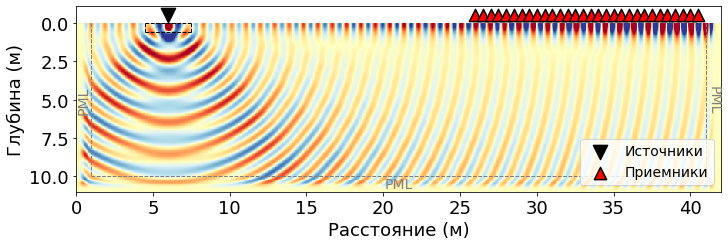

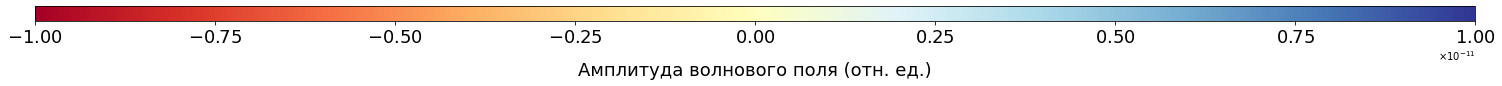

In [6]:
######################### Calculating displacement for a model with XPS barrier

# preparation of a reference model
vp, vs, rho, qp, qs = ut.prepare_referent_model(nz, nx, vs_ref, puasson_ref, qp_ref, qp_ref/2, nfreq)

# addition barrier to reference model
vp, vs, rho, qp, qs = ut.add_barrier2reference_model(h, vp, vs, rho, qp, qs, nfreq, 
                                                     vp_xps, vs_xps, rho_xps, qp_xps, qp_xps/2, 
                                                     bar_l, bar_w, soux, bar_w/2)

# drawing of a reference model
ut.draw_models(vp, vs, rho, x, z, pml, sou=[soux, souy-h*10],  rec=[recx, recy-h*10], signature_language = "ru")

# calculation elastic equation
fd_data  = solve_multi_frequency_elastic(frequencies, vp, vs, qp, qs, rho, nx, nz, h, npml, souy, soux, ampl_sou)

# drawing of a snapshot
ut.draw_real_snapshots(fd_data[0][0], x, z, pml, scale = 1e-11, sou=[soux, souy-h*10], 
                       rec=[recx, recy-h*10], fontsize=18, figsize=(10, 5), title="", 
                       figname="figures/fig_5_4", cbarfigname="figures/fig_5_colorbar",
                       barrier_xy=[soux, souy+bar_w/2], barrier_wh=[bar_l, bar_w], signature_language = "ru")

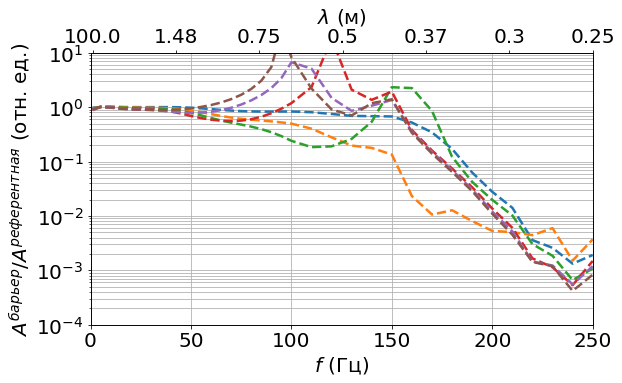

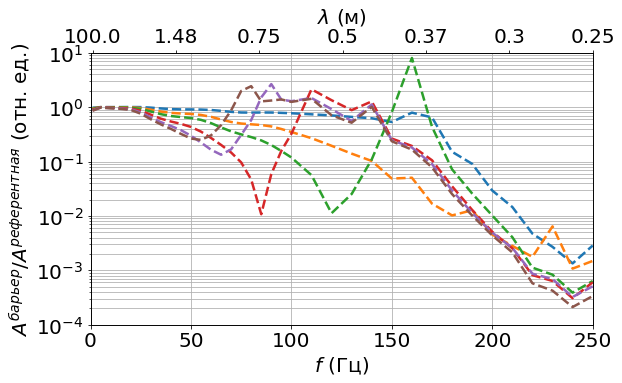

Median ratio for rockwool_horizontal on all frequencies and all barrier configurations is 0.66
Ratio for rockwool_horizontal on 100 frequency with 0.6 width and 3 length barrier is 0.119


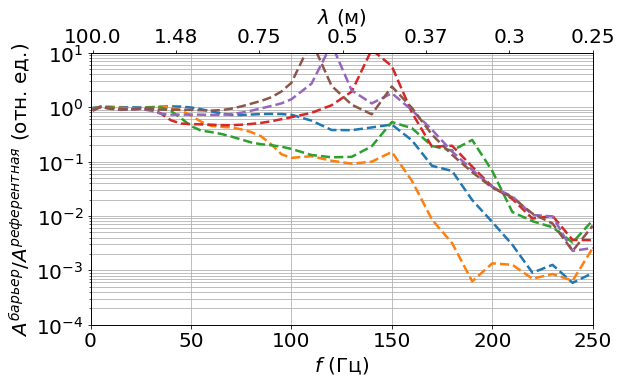

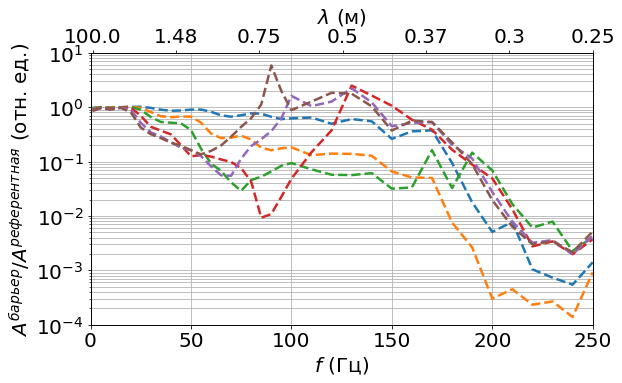

Median ratio for eps_horizontal on all frequencies and all barrier configurations is 0.449
Ratio for eps_horizontal on 100 frequency with 0.6 width and 3 length barrier is 0.094


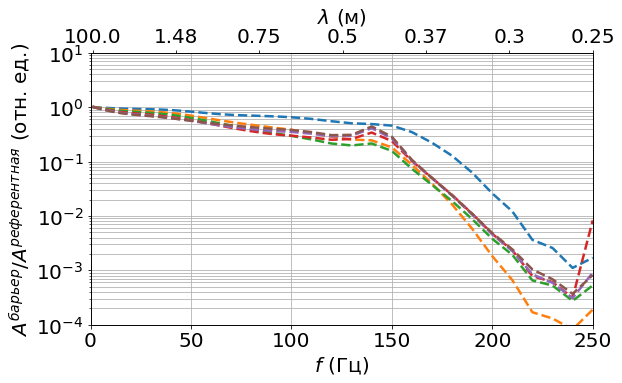

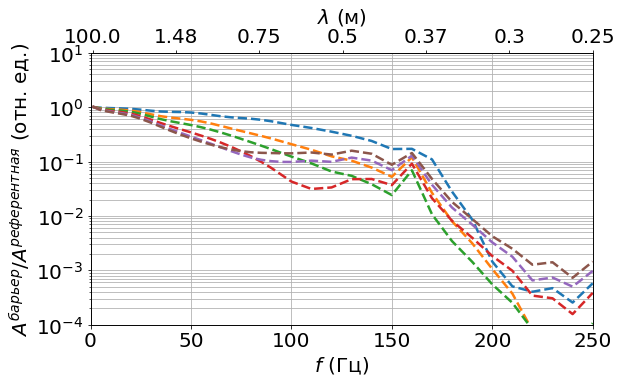

Median ratio for xps_horizontal on all frequencies and all barrier configurations is 0.327
Ratio for xps_horizontal on 100 frequency with 0.6 width and 3 length barrier is 0.123


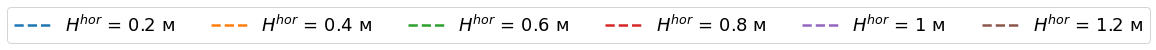

In [7]:
frequencies = np.r_[1, np.arange(5, 100, 5), np.arange(100, 260, 10)]  

# barriers configuration
bar_width = [0.2, 0.4, 0.6, 0.8, 1, 1.2]
bar_length = [1.5, 3]

ifig = 1
figtitle = "figures/fig_4_"
figtitle_legend = "figures/fig_4_legend"
labels = [r"$H^{hor}$ = "+f"{bar_w}" + " м" for bar_w in bar_width]
legend_elements, ifig = ut.plot_efficiency_for_all_barrier_configurations("tmp/", 'homogeneous', 'rockwool_horizontal', frequencies,
                                                                       bar_length,  bar_width, figtitle = figtitle, ifig=ifig)
legend_elements, ifig = ut.plot_efficiency_for_all_barrier_configurations("tmp/", 'homogeneous', 'eps_horizontal', frequencies,
                                                                       bar_length,  bar_width, figtitle = figtitle, ifig=ifig)
legend_elements, ifig = ut.plot_efficiency_for_all_barrier_configurations("tmp/", 'homogeneous', 'xps_horizontal', frequencies,
                                                                       bar_length,  bar_width, figtitle = figtitle, ifig=ifig)
ut.plot_legend(legend_elements, labels, figtitle=figtitle_legend)


In [8]:
np.squeeze

<function squeeze at 0x7fae0c23eeb0>